In [13]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

In [14]:
data = pd.read_csv("Ads.csv")

data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
real_x = data.iloc[:, [2,3]].values

real_y = data.iloc[:, 4].values

In [16]:
training_x, test_x, training_y, test_y = train_test_split(real_x, real_y, test_size = 0.25, random_state = 0)

In [17]:
Scaler = StandardScaler()

In [18]:
training_x = Scaler.fit_transform(training_x)

test_x = Scaler.fit_transform(test_x)

In [19]:
cls_svm = SVC(kernel= "linear", random_state = 0)

In [20]:
cls_svm.fit(training_x, training_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [21]:
test_y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [22]:
pred_y = cls_svm.predict(test_x)

pred_y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [23]:
c_m = confusion_matrix(test_y, pred_y)

c_m

array([[63,  5],
       [ 7, 25]], dtype=int64)

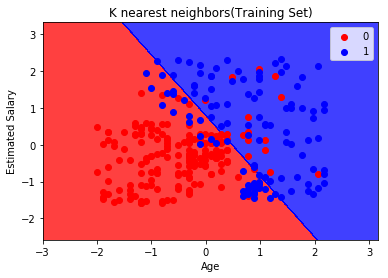

In [24]:
#Create local variables X_set and y_set. Because we use these #variables again in the test set
X_set, y_set = training_x, training_y
#Create the grid. step=0.01 means all the pixels were actually with #a 0.01 resolution. min and max of the 
#X_Set use with minus ana plus one to prevent ponits to be squeezed #on the axes.
X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))
#This is the line applying the classifier on all the pixel #observation points. It colors all the red pixel 
#points and the blue pixel points. contour function make the contour #between red and blue regions.
plt.contourf(X1,X2, cls_svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
             cmap = ListedColormap(('red','blue')))
#plot the limits of the age and the estimated salary lines.
plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))
#This loop here plots all the data points that are the real values.
 
for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c= ListedColormap(('red','blue'))(i) ,label= j)
#Add the name of the plot and the labels.
plt.title('K nearest neighbors(Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

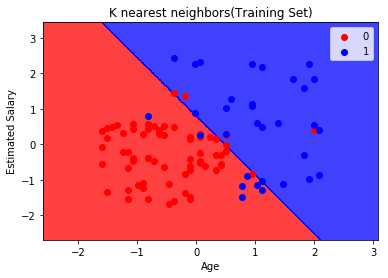

In [25]:
#Create local variables X_set and y_set. Because we use these #variables again in the test set
X_set, y_set = test_x, test_y
#Create the grid. step=0.01 means all the pixels were actually with #a 0.01 resolution. min and max of the 
#X_Set use with minus ana plus one to prevent ponits to be squeezed #on the axes.
X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))
#This is the line applying the classifier on all the pixel #observation points. It colors all the red pixel 
#points and the blue pixel points. contour function make the contour #between red and blue regions.
plt.contourf(X1,X2, cls_svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
             cmap = ListedColormap(('red','blue')))
#plot the limits of the age and the estimated salary lines.
plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))
#This loop here plots all the data points that are the real values.
 
for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c= ListedColormap(('red','blue'))(i) ,label= j)
#Add the name of the plot and the labels.
plt.title('K nearest neighbors(Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()